In [1]:
import numpy as np
import pandas as pd


In [2]:
heart_disease=pd.read_csv("data/heart-disease.csv")


In [3]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create Features Matrix
x=heart_disease.drop("target",axis=1)
# Create y (labels)
y=heart_disease["target"]


In [5]:
# Choose  the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
# we will keep default hyperparameter
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# Fit the model to training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
y_train

116    1
2      1
24     1
122    1
74     1
      ..
220    0
126    1
189    0
293    0
142    1
Name: target, Length: 242, dtype: int64

In [7]:
# train model here
clf.fit(x_train,y_train);

In [8]:
# make a predication
y_label=clf.predict(np.array([0,2,3,4])) 

C:\Users\brij bihari\Desktop\sample_project\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
x_test

In [9]:
 y_pred=clf.predict(x_test)

In [10]:
# result of our model on test dataset
y_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [11]:
# Answer of testing dataset
y_test

183    0
254    0
84     1
65     1
273    0
      ..
270    0
208    0
12     1
16     1
288    0
Name: target, Length: 61, dtype: int64

In [12]:
# Evalute the model on training data and test data
clf.score(x_train,y_train)

1.0

In [13]:
clf.score(x_test,y_test)

0.7868852459016393

In [14]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79        34
           1       0.71      0.89      0.79        27

    accuracy                           0.79        61
   macro avg       0.80      0.80      0.79        61
weighted avg       0.81      0.79      0.79        61



In [16]:
confusion_matrix(y_test,y_pred)

array([[24, 10],
       [ 3, 24]], dtype=int64)

In [17]:
accuracy_score(y_test,y_pred)

0.7868852459016393

In [18]:
 # Improve a model
# Try diffrent amount of n_estimators
acuracy=-float('inf')
esti=0
for est in range(10,101):
    model=RandomForestClassifier(n_estimators=est)
    model.fit(x_train,y_train)
    if model.score(x_test,y_test)>acuracy:
        acuracy=model.score(x_test,y_test)
        esti=est
print(acuracy)   
model=RandomForestClassifier(n_estimators=esti)
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.819672131147541
0.7377049180327869


In [19]:
# save model
import pickle
pickle.dump(model,open("random_forest_model1.pk1","wb"))

In [20]:
loaded_model=pickle.load(open("random_forest_model1.pk1","rb"))
loaded_model.score(x_test,y_test)
p=loaded_model.predict(x_test)
accuracy_score(y_test,p)

0.7377049180327869

# Getting Data Ready to be used with machine learning

1. split the data into features and label x(features),y(labels)
2. filling or dismiss missing value
3. converting non numerical value to numerical value aka featuring coding


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [23]:
x=heart_disease.drop("target",axis=1)
y=heart_disease['target']

In [24]:
# Split the data into training and test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

##  Make Sure data is numerical


In [25]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [26]:
# Split into X & y and train/test
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [28]:
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder(sparse=False)
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X=pd.DataFrame(transformed_X)
# # that what one hot do
new_Data=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
new_Data

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [29]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

In [30]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=28)

In [31]:
model.score(X_test,y_test)

0.0

# Handling Missing data

Fill with missing value(imputation)
Remove the samples with data together

In [32]:
# Import car sales dataframe with missing values
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [33]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
# Let's convert the categorical columns to one hot encoded (code copied from above)
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X=pd.DataFrame(transformed_X)
transformed_X

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
995,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
996,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
997,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
998,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


# fill data 

In [35]:
car_sales_missing["Make"].fillna("missing",inplace=True)
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)

In [36]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [37]:
car_sales_missing.dropna(inplace=True)

In [38]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [39]:
X=car_sales_missing.drop("Price",axis=1)
Y=car_sales_missing["Price"]

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X=pd.DataFrame(transformed_X)
transformed_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


# Fill Missing value with sci-kit learn

In [41]:
# Reimport the DataFrame
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()
len(car_sales_missing)

950

In [43]:
# Split into x,y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)


In [44]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# Fill categorical values with 'missing' and numerical with mean
cat_inputer=SimpleImputer(strategy='constant',fill_value='missing')
door_inputer=SimpleImputer(strategy='constant',fill_value=4)
num_inputer=SimpleImputer(strategy='mean')
# define columns
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]
# Create an inputer
inputer=ColumnTransformer([("cat_inputer",cat_inputer,cat_features),
                          ("door_inputer",door_inputer,door_features),
                           ("num_inputer",num_inputer,num_features)
                          ])
# transform data
filled_X_train = inputer.fit_transform(X_train)
filled_X_test = inputer.transform(X_test)

In [45]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()


Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [46]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
X_train.isna().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [48]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

# Choosing right estimator/algorithm
sklearn uses estimator as another term for ML algorithm
1 Classification predicating whether a sample is one thing or not
2 Regression predict a number

In [49]:
# picking a ml model for regression problem
from sklearn.datasets import load_boston
boston=load_boston()
boston
# df=pd.DataFrame(boston["data"],columns=boston["features_names"])
# df

C:\Users\brij bihari\Desktop\sample_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Calif

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [50]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [51]:
len(boston_df)

506

In [52]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [53]:
# try Redge Regression
from sklearn.linear_model import Ridge
np.random.seed(42)
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=Ridge()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6662221670168522


![SNOWFALL](ml_map.png)

In [54]:
from sklearn.ensemble import RandomForestRegressor,RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8654448653350507

# Model for classification Problem

In [55]:
# acc to map try linear svc
from sklearn.svm import LinearSVC
np.random.seed(42)
heart_disease=pd.read_csv("data/heart-disease.csv")
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)



In [56]:
np.random.seed(42)
clf=LinearSVC(max_iter=10000)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\brij bihari\Desktop\sample_project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [57]:
# as this is not working we are going to use RandomForestClassifier
np.random.seed(42)
clf2=RandomForestRegressor()
clf2.fit(X_train,y_train)
clf2.score(X_test,y_test)

0.5300502155172415

# if you have structured data  use ensemble method RandomForest
# otherwise use Deep Learning 

# fit model on data and make it use to predict

In [58]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8524590163934426

# use a train model to make predication
2 ways to make predication
1.predict()
2.predict_proba()

In [59]:
y_preds = clf.predict(X_test)
np.mean(y_preds==np.array(y_test))

0.8688524590163934

In [60]:
clf.score(X_test,y_test)

0.8688524590163934

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8688524590163934

In [62]:
# make predication with predictproba
model.predict_proba(X_test)

array([[0.9 , 0.1 ],
       [0.44, 0.56],
       [0.46, 0.54],
       [0.92, 0.08],
       [0.17, 0.83],
       [0.13, 0.87],
       [0.28, 0.72],
       [0.95, 0.05],
       [0.97, 0.03],
       [0.57, 0.43],
       [0.24, 0.76],
       [0.7 , 0.3 ],
       [0.09, 0.91],
       [0.93, 0.07],
       [0.07, 0.93],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.9 , 0.1 ],
       [0.97, 0.03],
       [0.93, 0.07],
       [0.48, 0.52],
       [0.94, 0.06],
       [0.34, 0.66],
       [0.26, 0.74],
       [0.36, 0.64],
       [0.31, 0.69],
       [0.26, 0.74],
       [0.23, 0.77],
       [0.88, 0.12],
       [0.13, 0.87],
       [0.85, 0.15],
       [0.93, 0.07],
       [0.99, 0.01],
       [0.67, 0.33],
       [0.34, 0.66],
       [0.9 , 0.1 ],
       [0.39, 0.61],
       [0.25, 0.75],
       [0.47, 0.53],
       [0.12, 0.88],
       [0.16, 0.84],
       [0.2 , 0.8 ],
       [0.15, 0.85],
       [0.3 , 0.7 ],
       [0.31, 0.69],
       [0.74, 0.26],
       [0.31, 0.69],
       [0.  ,

In [63]:
# predict on same data
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [64]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=boston_df.drop("target",axis=1)
y=boston_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
np.mean(y_pred==np.array([y_test]))

0.0

In [65]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

2.136382352941176

# Evaluting Machine Learning Model


    

In [66]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)


RandomForestClassifier()

# three ways to eval a model 

1 estimator score method
2. scoring paramter
3 problem specifiv metric

In [67]:
clf.score(x_train,y_train)

1.0

In [68]:
clf.score(x_test,y_test)

0.8524590163934426

In [69]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestRegressor()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8654448653350507

In [70]:
clf

RandomForestRegressor()

# Eval using scoring param

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
clf.score(x_test,y_test)

0.8524590163934426

In [73]:
cross_val_score(clf,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [74]:
np.random.seed(42)
single_score=clf.score(x_test,y_test)
clf_crossval_score=cross_val_score(clf,x,y).mean()
single_score,clf_crossval_score



(0.8524590163934426, 0.8248087431693989)

In [75]:
# default scoring paramter of classifier=mean accuracy
# Scoring paramter set to None by deafult
cross_val_score(clf,x,y,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [76]:
# classification model eval metrics
#1 accuracy
# 2 area under ROC curve
# 3 Confusion matrix
# 4 Classification report

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
clf=RandomForestClassifier()
corss_val_score=cross_val_score(clf,x,y)

# Area under the receiver operating char. curve
* Area under curve
* ROC curve
ROC compares of a model true positive rate vs a model false positive rate
* True positive=model predicts 1 when truth is 1
* False positive=model predicts 1 when truth is 0
* True negative=model predicts 0 when truth is 0
* False negative=model predicts 0 when truth is 1 

In [78]:
from sklearn.metrics import roc_curve
clf.fit(x_train,y_train)
y_probs=clf.predict_proba(x_test)
y_probs


array([[0.87, 0.13],
       [0.41, 0.59],
       [0.45, 0.55],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.14, 0.86],
       [0.4 , 0.6 ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.43, 0.57],
       [0.23, 0.77],
       [0.71, 0.29],
       [0.09, 0.91],
       [0.93, 0.07],
       [0.06, 0.94],
       [0.04, 0.96],
       [0.01, 0.99],
       [0.86, 0.14],
       [0.96, 0.04],
       [0.95, 0.05],
       [0.5 , 0.5 ],
       [0.84, 0.16],
       [0.36, 0.64],
       [0.31, 0.69],
       [0.31, 0.69],
       [0.36, 0.64],
       [0.2 , 0.8 ],
       [0.23, 0.77],
       [0.86, 0.14],
       [0.14, 0.86],
       [0.9 , 0.1 ],
       [0.95, 0.05],
       [0.95, 0.05],
       [0.64, 0.36],
       [0.49, 0.51],
       [0.88, 0.12],
       [0.49, 0.51],
       [0.13, 0.87],
       [0.31, 0.69],
       [0.13, 0.87],
       [0.14, 0.86],
       [0.17, 0.83],
       [0.19, 0.81],
       [0.36, 0.64],
       [0.29, 0.71],
       [0.81, 0.19],
       [0.36, 0.64],
       [0.  ,

In [79]:
y_probs_positive=y_probs[:,1]
y_probs_negative=y_probs[:,0]
y_probs_negative
y_probs_positive

array([0.13, 0.59, 0.55, 0.11, 0.81, 0.86, 0.6 , 0.04, 0.  , 0.57, 0.77,
       0.29, 0.91, 0.07, 0.94, 0.96, 0.99, 0.14, 0.04, 0.05, 0.5 , 0.16,
       0.64, 0.69, 0.69, 0.64, 0.8 , 0.77, 0.14, 0.86, 0.1 , 0.05, 0.05,
       0.36, 0.51, 0.12, 0.51, 0.87, 0.69, 0.87, 0.86, 0.83, 0.81, 0.64,
       0.71, 0.19, 0.64, 1.  , 0.17, 0.03, 0.16, 0.17, 0.77, 0.7 , 0.17,
       0.07, 0.35, 1.  , 0.11, 0.  , 0.14])

In [80]:
# calculate fpr,tpr,threshold
fpr,tpr,threshold=roc_curve(y_test,y_probs_positive)
# check false positive rates
fpr
tpr

array([0.     , 0.0625 , 0.1875 , 0.25   , 0.34375, 0.375  , 0.4375 ,
       0.4375 , 0.53125, 0.59375, 0.6875 , 0.71875, 0.75   , 0.75   ,
       0.8125 , 0.875  , 0.9375 , 0.9375 , 0.96875, 0.96875, 0.96875,
       0.96875, 0.96875, 0.96875, 0.96875, 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     ])

In [81]:
# Create a function for plotting ROC Curves
def plot_roc_curve(fpr,tpr):
    """
    plots a ROC Curve given the false positive rate
    and true positive rate of a model
    """
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

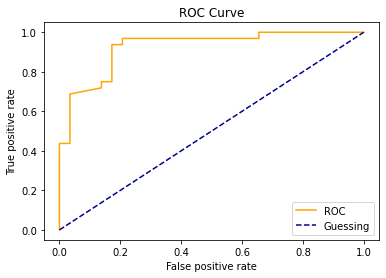

In [82]:
plot_roc_curve(fpr,tpr)

In [83]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9251077586206896

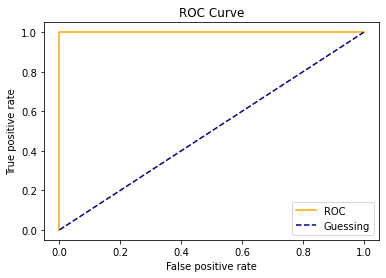

In [84]:
# plot perfect ROC curve and AUC score
fpr,tpr,threshold=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [85]:
# perfect AUC score
roc_auc_score(y_test,y_test)

1.0

# Confusion Matrix

### A confusion matrix is  a quick way to compare the labels a model predicts and the actual labels it was suppose to predict.In essence giving you an idea of where the model is getting confused


In [86]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [87]:
# Visualize confusion matrix with pr.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual labels"],
           colnames=["Pred lables"])

Pred lables,0,1
Actual labels,,
0,24,5
1,4,28


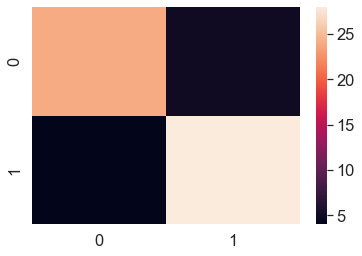

In [88]:
# Make confusion matrix more visual with sea born heatmap()
import seaborn as sns
# set the font scale
sns.set(font_scale=1.5)
conf_mat=confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat);

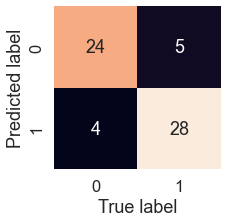

In [89]:
def plot_conf_mat(conf_mat):
    """
    plot a confusion using seaborn heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,annot=True # annot with conf_mat info
                   ,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(conf_mat)

In [90]:
from sklearn.metrics import plot_confusion_matrixcon
plot_confusion_matrix(clf,x,y)

ImportError: cannot import name 'plot_confusion_matrixcon' from 'sklearn.metrics' (C:\Users\brij bihari\Desktop\sample_project\env\lib\site-packages\sklearn\metrics\__init__.py)

# Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

# Regression Model Eval metric

##### R^2
##### R2 : compares your model predication to the mean of target can range from -inf to 1 for example if all your model does is predict the mean of target it r2 values will be 0 and if your model  prefectly predicts a range of number it R2 would be 1
##### Mean Abs error
##### Mean squared error

In [ ]:

np.random.seed(42)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

In [ ]:
from sklearn.metrics import r2_score
y_test_mean=np.full(len(y_test),y_test.mean())

In [ ]:
y_test_mean

In [ ]:
r2_score(y_test,y_test) 

### Mean abs error

In [ ]:
from sklearn.metrics import mean_absolute_error
y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

In [ ]:
df=pd.DataFrame(data={"actual values":y_test,"predicited values":y_preds})
df["diffrence"]=df["predicited values"]-df["actual values"]
df["squared"]=df["diffrence"]**2
df

# mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_preds)
mse

# using scoring parameter


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
heart_disease=pd.read_csv("data/heart-disease.csv")
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
clf=RandomForestClassifier()

In [91]:
np.random.seed(42)
cv_acc=cross_val_score(clf,x,y,scoring="recall")
cv_acc.mean()

0.8545454545454545

# using different evaluation metrics a Scikit leanr function 

In [92]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_preds=clf.predict(x_test)
# eval classifier
print(accuracy_score(y_test,y_preds))
print(precision_score(y_test,y_preds))
print(recall_score(y_test,y_preds))
print(f1_score(y_test,y_preds))


0.8524590163934426
0.8484848484848485
0.875
0.8615384615384615


In [93]:
from sklearn.metrics import r2_score,mean_absolute_error,mea
np.random.seed(42)
boston_df
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# clf=RandomForestRegressor()
# clf.fit(x_train,y_train)
# y_preds=clf.predict(x_test)
# # eval classifier
# print(accuracy_score(y_test,y_preds))
# print(precision_score(y_test,y_preds))
# print(recall_score(y_test,y_preds))
# print(f1_score(y_test,y_preds))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# improving model
First predictions = baseline predictions. First model = baseline model.

From a data perspective:

Could we collect more data? (generally, the more data, the better)
Could we improve our data?
From a model perspective:

Is there a better model we could use?
Could we improve the current model?
Hyperparameters vs. Parameters

Parameters = model find these patterns in data
Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns
Three ways to adjust hyperparameters:

* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV


In [98]:
# tunning hyperparamter
# make three set training validation test
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### we are going to change 
* We're going to try and adjust:

`max_depth
max_features
min_samples_leaf
min_samples_split
n_estimators
`

In [109]:
def evaluate_preds(y_true,y_preds):
    
    """
    Perform eval comparision on y_true labels vs y_preds
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "recall":round(recall,2),
                 "f1":round(f1,2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict


In [110]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_ valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 75.56%
Precision: 0.73
Recall: 0.76
F1 score: 0.74


{'accuracy': 0.76, 'precision': 0.73, 'recall': 0.76, 'f1': 0.74}

In [130]:

np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100,max_depth=10)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evalute the 2nd classsifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 80.00%
Precision: 0.75
Recall: 0.86
F1 score: 0.80


### Hyperparameter tuning with RandomizedSearchCV

In [137]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}
np.random.seed(42)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)
# setup Randomized searchcv
rs_clf=RandomizedSearchCV(estimator=clf,param_distributions=grid,
                         n_iter=50,  #number of models to try
                          cv=5,
                          verbose=2
                         )
rs_clf.fit(x_train,y_train)




Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   3.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END max_depth=20, max_features

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samp

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.0s


KeyboardInterrupt: 

In [141]:
rs_clf.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [136]:
y_preds=rs_clf.predict(x_test)
rs_metric=evaluate_preds(y_test,y_preds)


Acc: 77.05%
Precision: 0.81
Recall: 0.76
F1 score: 0.79


# hyperparameter tuning with gridsearchcv

In [140]:
rs_clf.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [143]:
grid2={'n_estimators': [ 100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [ 6],
 'min_samples_leaf': [1, 2]}

from sklearn.model_selection import GridSearchCV,train_test_split
np.random.seed(42)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)
# setup Randomized searchcv
gs_clf=GridSearchCV(estimator=clf
                    ,param_grid=grid2,
                          cv=5,
                          verbose=2
                         )
gs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [145]:
y_preds=gs_clf.predict(x_test)
rs_metric=evaluate_preds(y_test,y_preds)

Acc: 80.33%
Precision: 0.84
Recall: 0.79
F1 score: 0.82


In [147]:
import pickle

# Save an extisting model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)
                                       

RandomForestRegressor()